In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

In [77]:
graduate = pd.read_csv('graduate-admissions/Admission_Predict.csv')

In [78]:
graduate.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


In [82]:
graduate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 9 columns):
Serial No.           401 non-null int64
GRE Score            400 non-null float64
TOEFL Score          400 non-null float64
University Rating    400 non-null float64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null float64
Chance of Admit      400 non-null float64
dtypes: float64(8), int64(1)
memory usage: 28.3 KB


In [86]:
graduate.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,401.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,201.000000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.902977,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,101.000000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,201.000000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,301.000000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,401.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [87]:
graduate.sample(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
68,69,318.0,109.0,3.0,3.5,4.0,9.22,1.0,0.68
14,15,311.0,104.0,3.0,3.5,2.0,8.20,1.0,0.61


In [88]:
graduate.dtypes

Serial No.             int64
GRE Score            float64
TOEFL Score          float64
University Rating    float64
SOP                  float64
LOR                  float64
CGPA                 float64
Research             float64
Chance of Admit      float64
dtype: object

In [89]:
graduate.drop(columns='Serial No.',inplace=True)

In [90]:
graduate.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


In [91]:
graduate.shape

(401, 8)

In [92]:
graduate.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [93]:
graduate.rename(columns = {'GRE Score':'GRE','TOEFL Score':'TOEFL','University Rating':'UniversityRating'
                          ,'Chance of Admit ':'Chance'},inplace=True)

In [94]:
graduate.columns

Index(['GRE', 'TOEFL', 'UniversityRating', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Chance'],
      dtype='object')

In [95]:
graduate.head()

,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,Chance
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


In [96]:
x=graduate[graduate.isnull()]

In [97]:
graduate.isnull().sum()

GRE                 1
TOEFL               1
UniversityRating    1
SOP                 1
LOR                 1
CGPA                1
Research            1
Chance              1
dtype: int64

In [17]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [18]:
missing_values_table(graduate)

Your selected dataframe has 8 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
GRE,1,0.2
TOEFL,1,0.2
UniversityRating,1,0.2
SOP,1,0.2
LOR,1,0.2
CGPA,1,0.2
Research,1,0.2
Chance,1,0.2


In [19]:
x=graduate.isnull().sum()

In [98]:
y=len(graduate)

In [101]:
percent_val = (x/y) * 100

In [102]:
percent_val

,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,Chance
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
missing_table=pd.concat([x,percent_val],axis=1)

In [105]:
missing_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 16 columns):
GRE                 0 non-null float64
TOEFL               0 non-null float64
UniversityRating    0 non-null float64
SOP                 0 non-null float64
LOR                 0 non-null float64
CGPA                0 non-null float64
Research            0 non-null float64
Chance              0 non-null float64
GRE                 0 non-null float64
TOEFL               0 non-null float64
UniversityRating    0 non-null float64
SOP                 0 non-null float64
LOR                 0 non-null float64
CGPA                0 non-null float64
Research            0 non-null float64
Chance              0 non-null float64
dtypes: float64(16)
memory usage: 50.2 KB


In [25]:
missing_table.rename(columns = {0:'Missing Values',1:'missing'},inplace=True)

In [106]:
missing_table

,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,Chance,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,Chance
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
missing_table.shape[0]

401

In [108]:
graduate.dropna()

,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,Chance
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65
5,330.0,115.0,5.0,4.5,3.0,9.34,1.0,0.90
6,321.0,109.0,3.0,3.0,4.0,8.20,1.0,0.75
7,308.0,101.0,2.0,3.0,4.0,7.90,0.0,0.68
8,302.0,102.0,1.0,2.0,1.5,8.00,0.0,0.50
9,323.0,108.0,3.0,3.5,3.0,8.60,0.0,0.45


In [29]:
graduate.isna()

,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,Chance
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [113]:
graduate.shape

(400, 8)

In [111]:
graduate.dropna(axis=0, how='any',inplace=True)

In [112]:
graduate.head()

,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,Chance
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


In [115]:
graduate['GRE'] = (graduate['GRE']-graduate['GRE'].mean())/graduate['GRE'].std()

In [117]:
graduate['TOEFL'] = (graduate['TOEFL']-graduate['TOEFL'].mean())/graduate['TOEFL'].std()

In [118]:
graduate.head(5)

,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,Chance
0,1.759903,1.744786,4.0,4.5,4.5,9.65,1.0,0.92
1,0.626871,-0.067551,4.0,4.0,4.5,8.87,1.0,0.76
2,-0.070379,-0.561824,3.0,3.0,3.5,8.00,1.0,0.72
3,0.452559,0.426723,3.0,3.5,2.5,8.67,1.0,0.80
4,-0.244691,-0.726582,2.0,2.0,3.0,8.21,0.0,0.65


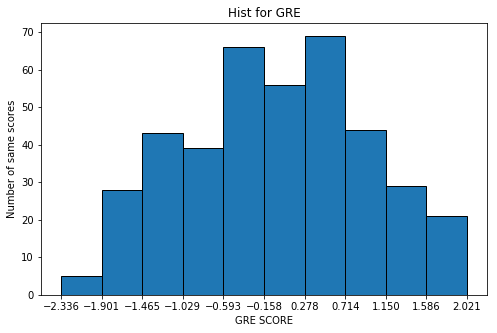

In [119]:
count,bin_edges = np.histogram(graduate['GRE'])
graduate['GRE'].plot(kind='hist',xticks=bin_edges , 
                     figsize=(8,5), edgecolor='black')

plt.title("Hist for GRE")
plt.ylabel("Number of same scores")
plt.xlabel("GRE SCORE")

plt.show()

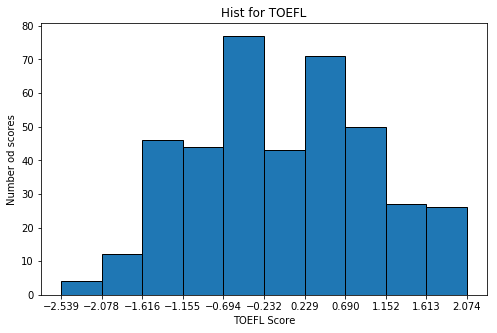

In [120]:
counts,xbins = np.histogram(graduate['TOEFL'])
graduate['TOEFL'].plot(kind='hist',figsize=(8,5),xticks=xbins
                      , edgecolor='black')

plt.title("Hist for TOEFL")
plt.ylabel("Number od scores")
plt.xlabel("TOEFL Score")

plt.show()

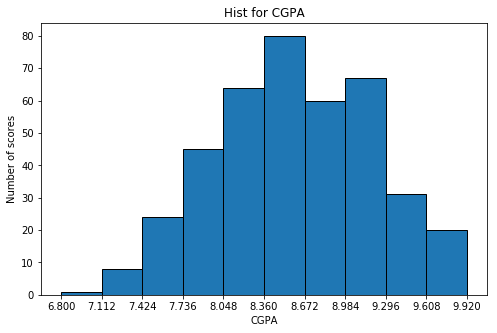

In [35]:
counts,xbins = np.histogram(graduate['CGPA'])
graduate['CGPA'].plot(kind='hist',figsize=(8,5),xticks=xbins
                      , edgecolor='black')

plt.title("Hist for CGPA")
plt.ylabel("Number of scores")
plt.xlabel("CGPA")

plt.show()

In [121]:
graduate.corr()

,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,Chance
GRE,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
UniversityRating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


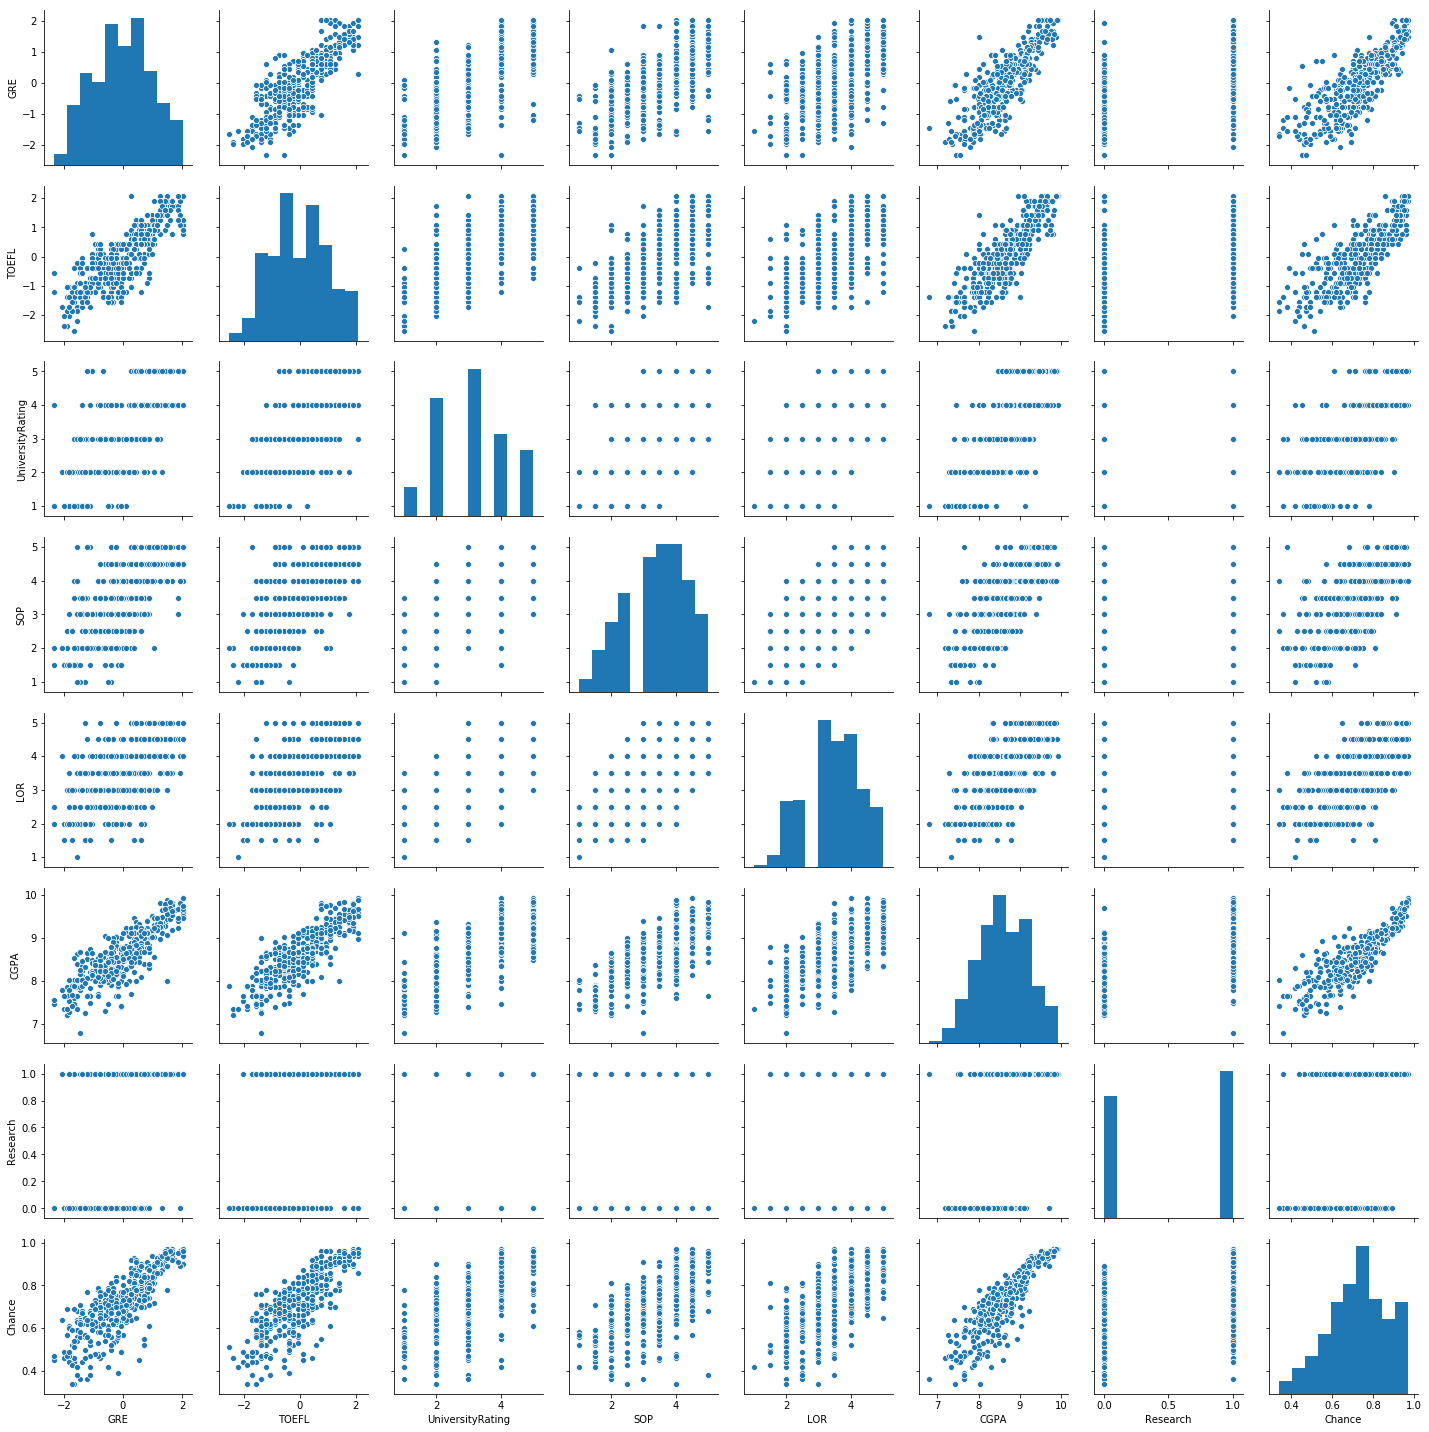

In [122]:
sns.pairplot(graduate)

/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


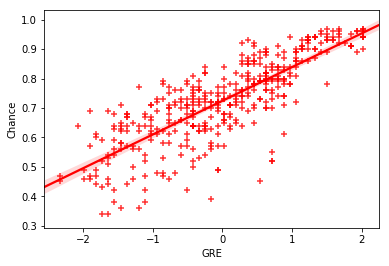

In [123]:
sns.regplot(x='GRE',y='Chance',data=graduate,color='red',marker='+')

In [128]:
pearson_coef, p_value = stats.pearsonr(graduate['GRE'], graduate['Chance'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8026104595903504  with a P-value of P = 2.4581124141795554e-91


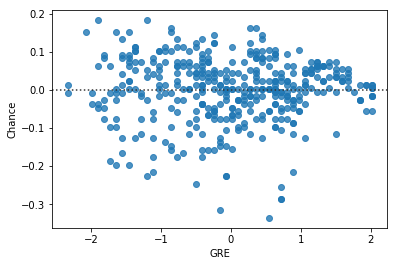

In [148]:
width = 12
height = 10
# plt.figure(figsize=(width, height))
sns.residplot(graduate['GRE'], graduate['Chance'])
plt.show()

/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


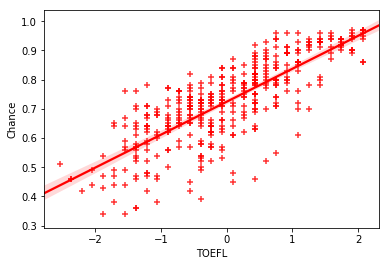

In [124]:
sns.regplot(x='TOEFL',y='Chance',data=graduate,color='red',marker='+')

In [130]:
pearson_coef, p_value = stats.pearsonr(graduate['TOEFL'], graduate['Chance'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.7915939869351044  with a P-value of P = 3.6341021759986095e-87


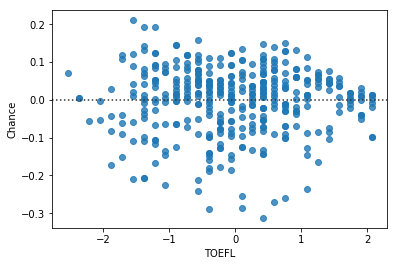

In [149]:
sns.residplot(graduate['TOEFL'], graduate['Chance'])
plt.show()

/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


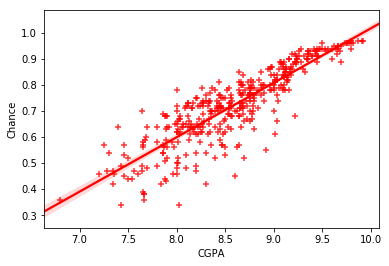

In [147]:
sns.regplot(x='CGPA',y='Chance',data=graduate,color='red',marker='+')

In [131]:
pearson_coef, p_value = stats.pearsonr(graduate['CGPA'], graduate['Chance'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8732890993553003  with a P-value of P = 2.336514000498104e-126


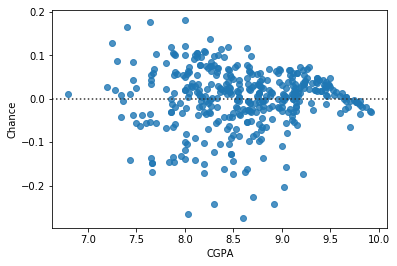

In [150]:
sns.residplot(graduate['CGPA'], graduate['Chance'])
plt.show()

/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


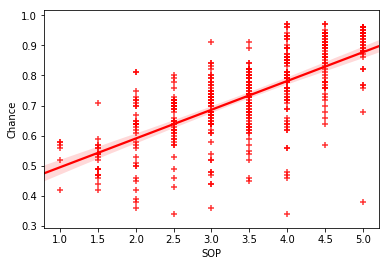

In [41]:
sns.regplot(x='SOP',y='Chance',data=graduate,color='red',marker='+')

In [132]:
pearson_coef, p_value = stats.pearsonr(graduate['SOP'], graduate['Chance'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6757318583886719  with a P-value of P = 1.1410946671026845e-54


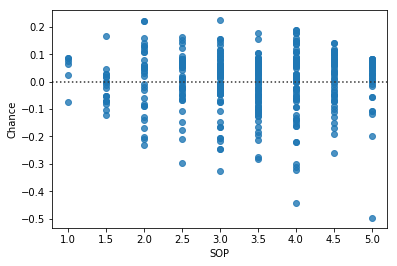

In [151]:
sns.residplot(graduate['SOP'], graduate['Chance'])
plt.show()

/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


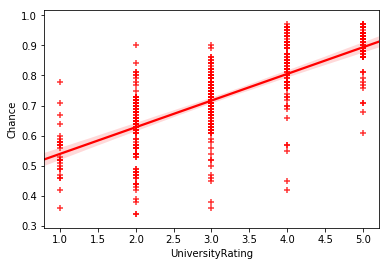

In [151]:
sns.regplot(x='UniversityRating',y='Chance',data=graduate,color='red',marker='+')

In [133]:
pearson_coef, p_value = stats.pearsonr(graduate['Research'], graduate['Chance'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5532021370190403  with a P-value of P = 1.9181733806928003e-33


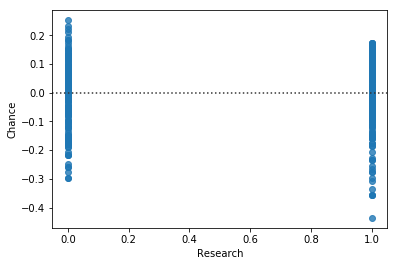

In [152]:
sns.residplot(graduate['Research'], graduate['Chance'])
plt.show()

In [134]:
x = graduate[['GRE', 'TOEFL','CGPA']]
y = graduate[['Chance']]

In [135]:
x.shape

(400, 3)

In [136]:
y.shape

(400, 1)

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print("Number of x training data is ", x_train.shape)
print("Number of x test data is ", x_test.shape)
print("Number of y train data is ", y_train.shape)
print("Number of y testing data is ", y_test.shape)

Number of x training data is  (280, 3)
Number of x test data is  (120, 3)
Number of y train data is  (280, 1)
Number of y testing data is  (120, 1)


In [138]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [139]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [140]:
lm.intercept_

array([-0.53499328])

In [141]:
lm.coef_

array([[0.02019167, 0.01960911, 0.14660197]])

In [154]:
Yhat = lm.predict(x_test)
# print("Prediction\n",Yhat)
# print("Actual\n",y_test)

In [157]:
Yhat_train = lm.predict(x_train)

In [142]:
mean_squared_error(y_test, Yhat)**0.5

0.06645673023918408

In [143]:
lm.score(x_test,y_test)

0.811535862599631

In [158]:
mean_squared_error(y_train, Yhat_train)**0.5

0.06645513856731888

/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


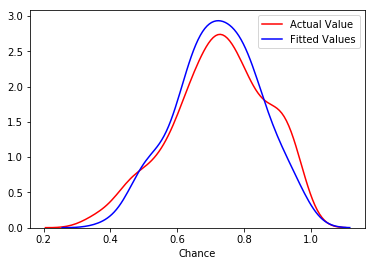

In [156]:
ax1 = sns.distplot(graduate['Chance'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.show()

/Users/neerajpadarthi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


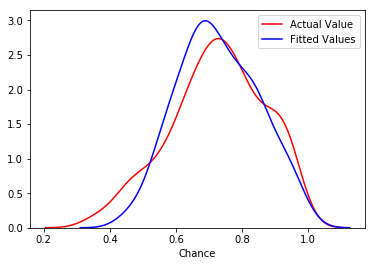

In [159]:
ax1 = sns.distplot(graduate['Chance'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat_train, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.show()

In [164]:
Rcross=cross_val_score(lm,x, y,cv=4)
Rcross

array([0.66275752, 0.79020264, 0.83554244, 0.81657182])

In [165]:
print("The mean of the folds are", Rcross.mean(),"and the standard deviation is" ,Rcross.std())

The mean of the folds are 0.7762686039095625 and the standard deviation is 0.06748455370195913
